Target:
- Predict house price and EDA

Features:
- Square_Footage: The size of the house in square feet. Larger homes typically have higher prices.
- Num_Bedrooms: The number of bedrooms in the house. More bedrooms generally increase the value of a home.
- Num_Bathrooms: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.
- Year_Built: The year the house was built. Older houses may be priced lower due to wear and tear.
- Lot_Size: The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.
- Garage_Size: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.
- Neighborhood_Quality: A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better neighborhoods - usually command higher prices.
- House_Price (Target Variable): The price of the house, which is the dependent variable you aim to predict.

## --> Import necessary library

In [1]:
import pandas as pd
import numpy as np

## --> Load CSV file

In [2]:
df = pd.read_csv("house_price.csv")

## --> Basic checks

In [3]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
df. shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [6]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

# --> EDA

### --> Import necessary library for EDA

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid", palette="viridis")

### -->correlation with housing price

Correlation with House Price:
House_Price             1.000000
Square_Footage          0.991261
Lot_Size                0.160412
Garage_Size             0.052133
Year_Built              0.051967
Num_Bedrooms            0.014633
Num_Bathrooms          -0.001862
Neighborhood_Quality   -0.007770
Name: House_Price, dtype: float64


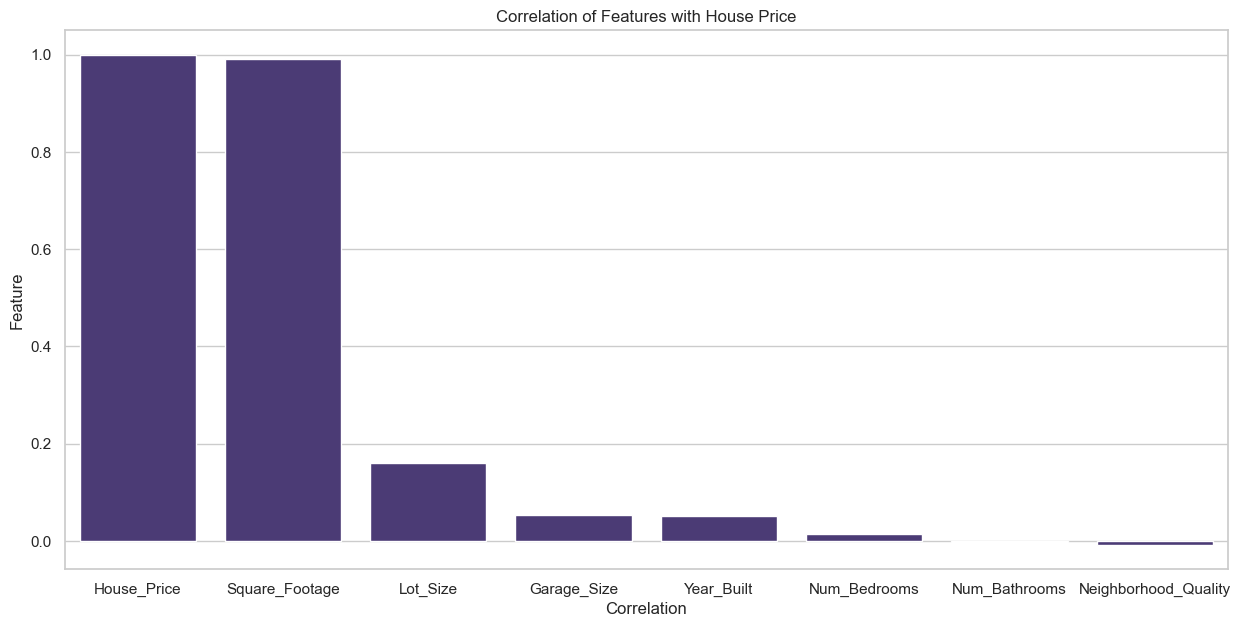

In [10]:
# Compute correlations with House_Price
corr_with_target = df.corr(numeric_only=True)['House_Price'].sort_values(ascending=False)

print("Correlation with House Price:")
print(corr_with_target)

# Plot correlation values
plt.figure(figsize=(15,7))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.title("Correlation of Features with House Price")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


analysis
- As we show clear forom the graph size of the house in squarefoot is highly impact on housing price.
- also in some percent lot size affect the housing price.
- as we show in graph number of bathrooms and neighborhood quality minorly affect the price of the house.

## --> Scatter plot

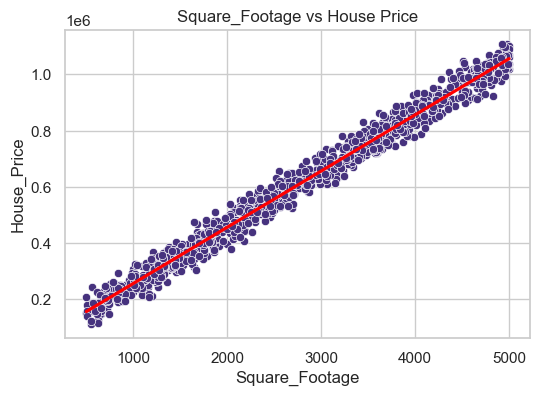

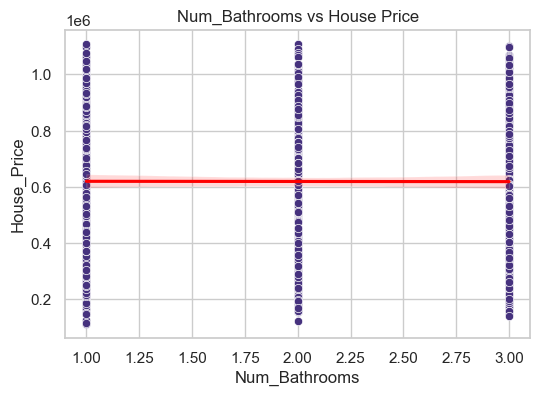

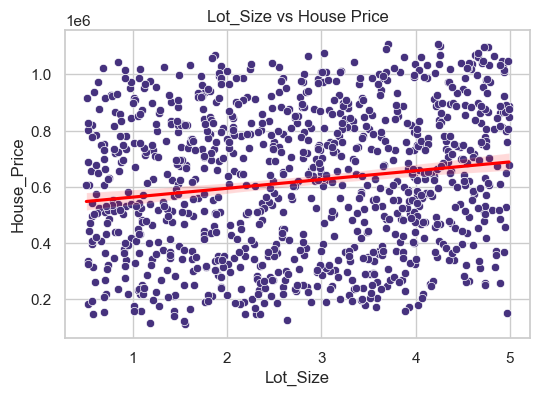

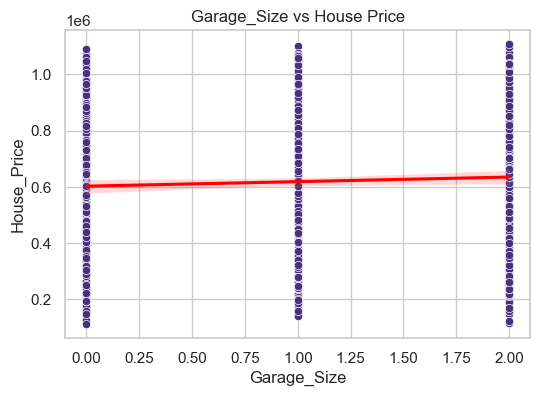

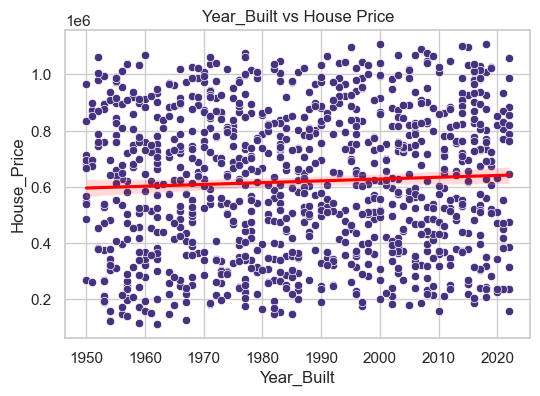

In [11]:
continuous_features = ['Square_Footage', 'Num_Bathrooms', 'Lot_Size', 
                        'Garage_Size', 'Year_Built']

for col in continuous_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y='House_Price')
    sns.regplot(data=df, x=col, y='House_Price', scatter=False, color='red')
    plt.title(f'{col} vs House Price')
    plt.show()

Analysis:
- As we show in graph size of the house matter most for house price
- there is no big change in new build house price compare to old but some how it shows little possitive change

## Heatmap

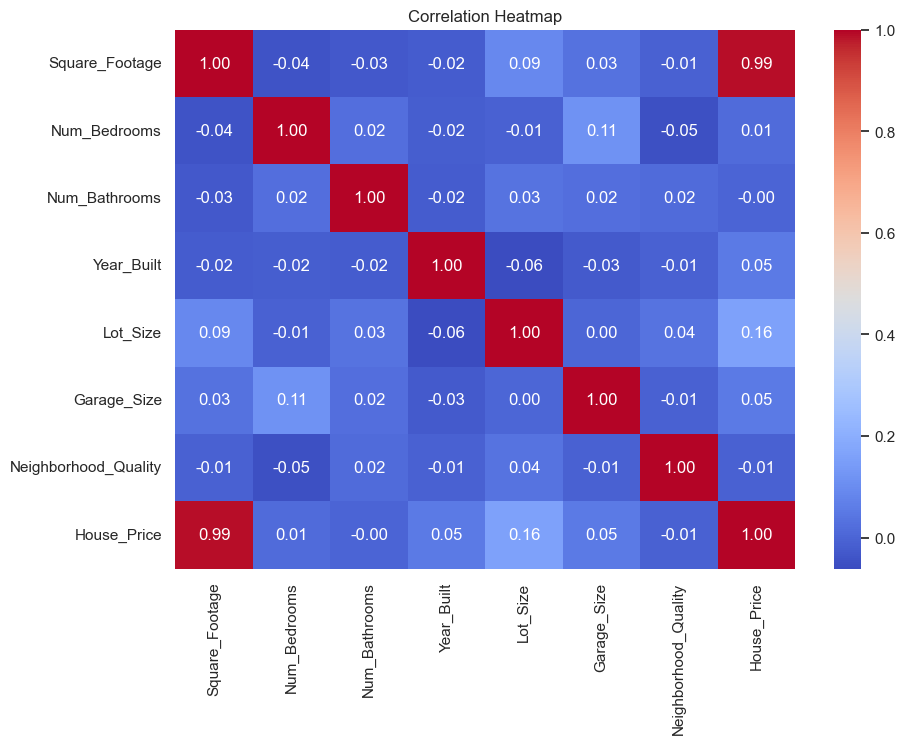

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Analysis:
- Heatmap shows size of the house is 99% correalted to house price.

## --> heatmap for number of bathroom and number of column vs house price

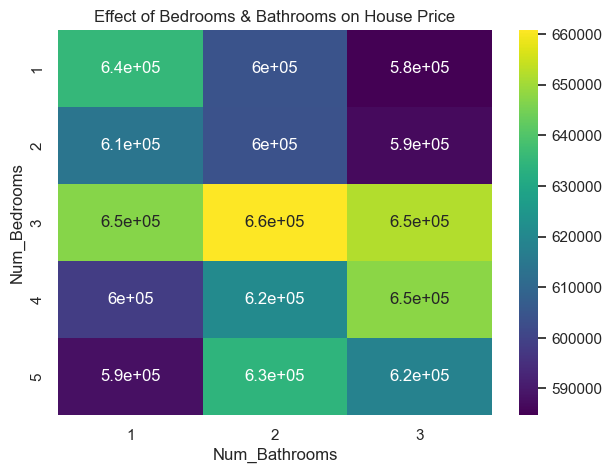

In [13]:
pivot = df.pivot_table(
    values='House_Price',
    index='Num_Bedrooms',
    columns='Num_Bathrooms',
    aggfunc='mean'
)

plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title("Effect of Bedrooms & Bathrooms on House Price")
plt.show()


Analysis:
- As we show 3 bedrooom with 2 bathroom have more price

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

In [16]:

X = df.drop("House_Price", axis=1)
y = df["House_Price"]

# List numerical features
numeric_features = [
    "Square_Footage",
    "Num_Bedrooms",
    "Num_Bathrooms",
    "Year_Built",
    "Lot_Size",
    "Garage_Size",
    "Neighborhood_Quality"
]

# Preprocessing: scaling numeric data
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)


In [17]:

# Final pipeline = Preprocessing + Model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:

# Fit the pipeline
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on test data
y_pred = model.predict(X_test)

# R2 Score
r2 = r2_score(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.993996126044307
Mean Squared Error: 387002853.2736571
